In [248]:
# в самом начале нам необохимо импортировать все библиотеки, которые планиуем использовать для нашего анализа
import numpy as np
import pandas as pd
from IPython.core.display import display
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import math
from IPython.display import Javascript
from itertools import combinations
from scipy.stats import ttest_ind

sns.set(style="whitegrid")
pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

In [249]:
import warnings; warnings.simplefilter('ignore')
sns.set()

## Подготовка и преобрзование данных

In [314]:
display(stud.head(10))
stud.info() 

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
41,GP,юноши,15,город,<= 3,вместе,4) высшее,4) высшее,учитель,.другое,близость к дому,-,1) < 15,1) < 2,другое,нет,да,нет,нет,нет,да,да,-,5) прекрасные,4) много,3) норм,5) прекрасное,8.0,60.0
194,GP,юноши,16,город,> 3,вместе,2) 5-9 кл,3) 11 кл / ср.сп.,.другое,.другое,близость к дому,отец,2) 15-30,1) < 2,другое,нет,нет,нет,нет,да,да,-,-,5) прекрасные,3) норм,3) норм,3) норм,0.0,70.0
239,GP,юноши,18,город,> 3,-,-,2) 5-9 кл,.другое,гос.служба,репутация,отец,1) < 15,2) 2-5,1,нет,нет,нет,нет,да,нет,-,-,5) прекрасные,5) оч много,4) много,2) плохое,0.0,0.0
290,GP,юноши,18,город,> 3,вместе,4) высшее,-,учитель,.другое,близость к дому,мать,1) < 15,2) 2-5,другое,нет,да,да,да,да,да,да,-,-,-,2) мало,5) прекрасное,11.0,55.0
54,GP,девушки,15,город,<= 3,-,3) 11 кл / ср.сп.,3) 11 кл / ср.сп.,-,.другое,.другое,мать,1) < 15,1) < 2,-,нет,нет,да,-,да,да,да,-,5) прекрасные,3) норм,4) много,1) ужасное,6.0,65.0
26,GP,юноши,15,город,> 3,вместе,2) 5-9 кл,2) 5-9 кл,.другое,-,близость к дому,мать,-,1) < 2,другое,нет,да,-,нет,да,да,да,-,4) хорошие,2) мало,2) мало,5) прекрасное,2.0,55.0
204,GP,девушки,16,за городом,> 3,вместе,2) 5-9 кл,2) 5-9 кл,гос.служба,гос.служба,репутация,мать,2) 15-30,4) > 10,-,нет,да,да,да,нет,да,да,-,5) прекрасные,3) норм,5) оч много,5) прекрасное,6.0,55.0
2,GP,девушки,15,город,<= 3,вместе,1) 4 кл,1) 4 кл,не работает,.другое,.другое,мать,1) < 15,2) 2-5,3,да,нет,-,нет,да,да,да,-,4) хорошие,3) норм,2) мало,3) норм,10.0,50.0
373,MS,девушки,17,за городом,> 3,вместе,1) 4 кл,2) 5-9 кл,.другое,-,-,мать,1) < 15,1) < 2,другое,нет,нет,нет,да,да,да,да,-,-,5) оч много,5) оч много,1) ужасное,14.0,25.0
112,GP,девушки,16,город,> 3,-,2) 5-9 кл,2) 5-9 кл,не работает,.другое,-,мать,-,-,1,да,нет,нет,да,да,да,да,-,3) норм,1) оч мало,2) мало,5) прекрасное,6.0,65.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 41 to 47
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   age         395 non-null    int64  
 3   address     395 non-null    object 
 4   famsize     395 non-null    object 
 5   pstatus     395 non-null    object 
 6   medu        395 non-null    object 
 7   fedu        395 non-null    object 
 8   mjob        395 non-null    object 
 9   fjob        395 non-null    object 
 10  reason      395 non-null    object 
 11  guardian    395 non-null    object 
 12  traveltime  395 non-null    object 
 13  studytime   395 non-null    object 
 14  failures    395 non-null    object 
 15  schoolsup   395 non-null    object 
 16  famsup      395 non-null    object 
 17  paid        395 non-null    object 
 18  activities  395 non-null    object 
 19  nursery     395 non-null    o

В датасете у нас 17 стрковых столбцов и 13 чиловых столбцов. Так же есть пустые значения Nan

In [251]:
#Добавим в начале функции чтобы автоматизировать наши действия и сократить код
def about_col(column):
    display(stud[column].value_counts())
    stud.loc[:, [column]].info()
    print ('Значений, упомянутых более 10 раз:', (stud[column].value_counts()>10).sum())
    print ("Уникальных значений:", stud[column].nunique())
    print ('Значений NAN в столбце:', stud[column].isnull().sum(axis = 0)
)

In [252]:
#Название столбцов нас устраивает. Однако для краоты и удобства использования заменим загланые буквы в названиях на маленькие
stud.columns = map(str.lower, stud.columns)
stud.columns


Index(['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
       'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

In [253]:
#Посмотрим общей выгрузкой на наши пропущенные значения
#Почти все пропущенные значения в большом колличестве существуют в нечисловых столбцах - а значит их можно спокойно заменять. Мы сделаемэ то ниже
stud.isnull().sum(axis = 0)
    

school                  0
sex                     0
age                     0
address                17
famsize                27
pstatus                45
medu                    3
fedu                   24
mjob                   19
fjob                   36
reason                 17
guardian               31
traveltime             28
studytime               7
failures               22
schoolsup               9
famsup                 39
paid                   40
activities             14
nursery                16
studytime, granular     7
higher                 20
internet               34
romantic               31
famrel                 27
freetime               11
goout                   8
health                 15
absences               12
score                   6
dtype: int64

Пробуем рассмореть первые столбцы, чтобы выявить рекоммендации для обработки остальных столбцов

In [255]:
#1 столбец - school - абревиатура шкаолы где учаться дети. У нас всего два уникальных вида занчений и нет пропусков тут.
about_col('school')
#малое кол-во уникальных значений


GP    349
MS     46
Name: school, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 0 to 380
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   school  395 non-null    object
dtypes: object(1)
memory usage: 26.2+ KB
Значений, упомянутых более 10 раз: 2
Уникальных значений: 2
Значений NAN в столбце: 0


F    208
M    187
Name: sex, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 0 to 380
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     395 non-null    object
dtypes: object(1)
memory usage: 26.2+ KB
Значений, упомянутых более 10 раз: 2
Уникальных значений: 2
Значений NAN в столбце: 0


(array([208., 187.]), array([0. , 0.5, 1. ]), <a list of 2 Patch objects>)

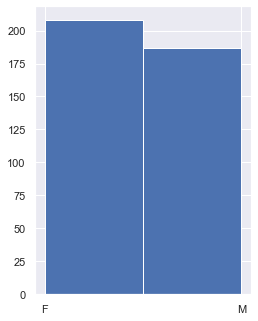

In [256]:
#2 столбец - sex - распределение по полу. Возможно тут будет дальше интересная корреляция из за разницы колличества
about_col('sex')
#произведем вывод графика с дополнениями параметров вывода для наглядности
fig = plt.figure()
axes = fig.add_axes([0, 0, 0.5, 1])
axes.hist(stud['sex'], bins = 2)
#женский пол у нас преобладает


Обощим наши процессы и выберем первичное рассмортение всех столбцов вместе

Учитывая относительное малое количество данных попробуем просмотреть все столбцы сразу и при этом приименим для всех столбчатые диаграммы. Посмотрим как у них будут распределяться признаки.

Так же для того, чтобы удобнее было читать значения преобразуем некоторые параметры в столбцах как номинативных так к в тех, где не отображаются количественные показатели

In [259]:
#Поместим наше правило по улучшению удобства порчитки графиков в специальный отдельный словарь

rules = {
    "sex": {
        "title": "пол",
        "values": {
          "F": 'девушки',
          "M": "юноши"   
        }
    },
    "address": {
        "title": "адрес",
        "values": {
          "U": "город",
          "R": "за городом"   
        }
    },
    "famsize": {
        "title": "размер семьи",
        "values": {
          "LE3": "<= 3",
          "GT3": "> 3"
        }
    },
    "pstatus": {
        "title": "родители вместе?",
        "values": {
          "T": "вместе",
          "A": "раздельно"
        }
    },
    "medu": {
        "title": "образование матери",
        "values": {
          "0.0": "0) нет",
          "1.0": "1) 4 кл",
          "2.0": "2) 5-9 кл",
          "3.0": "3) 11 кл / ср.сп.",
          "4.0": "4) высшее",
        }
    },
    "fedu": {
        "title": "образование отца",
        "values": {
          "0.0": "0) нет",
          "1.0": "1) 4 кл",
          "2.0": "2) 5-9 кл",
          "3.0": "3) 11 кл / ср.сп.",
          "4.0": "4) высшее",
        }
    },
    "fjob": {
        "title": "работа отца",
        "values": {
          "teacher": "учитель",
          "health": "здравохранение",
          "services": "гос.служба",
          "at_home": "не работает",
          "other": ".другое",
        }
    },
    "mjob": {
        "title": "работа матери",
        "values": {
          "teacher": "учитель",
          "health": "здравохранение",
          "services": "гос.служба",
          "at_home": "не работает",
          "other": ".другое",
        }
    },
    "reason": {
        "title": "причина выбора школы",
        "values": {
          "home": "близость к дому",
          "reputation": "репутация",
          "course": "об. программа",
          "other": ".другое",
        }
    },
    "guardian": {
        "title": "опекун",
        "values": {
          "mother": "мать",
          "father": "отец",
          "other": "другое",
        }
    },
    "traveltime": {
        "title": "время до школы (мин)",
        "values": {
          "1.0": "1) < 15",
          "2.0": "2) 15-30",
          "3.0": "3) 30-60",
          "4.0": "4) > 60",
        }
    },
    "studytime": {
        "title": "время учебы вне школы (ч)",
        "values": {
          "1.0": "1) < 2",
          "2.0": "2) 2-5",
          "3.0": "3) 5-10",
          "4.0": "4) > 10",
        }
    },
    "studytime, granular": {
        "title": "время учебы вне школы (ч) g",
        "values": {
          "1.0": "1) < 2",
          "2.0": "2) 2-5",
          "3.0": "3) 5-10",
          "4.0": "4) > 10",
        }
    },
    "failures": {
        "title": "внеучебные неудачи",
        "values": {
          "1.0": "1",
          "2.0": "2",
          "3.0": "3",
          "0.0": "другое",}
    },
    "schoolsup": {
        "title": "доп. обр. поддержка",
        "values": {
          "yes": "да",
          "no": "нет"
        }
    },
    "famsup": {
        "title": "семейная обр. поддержка",
        "values": {
          "yes": "да",
          "no": "нет"
        }
    },
    "paid": {
        "title": "доп. платная математика",
        "values": {
          "yes": "да",
          "no": "нет"
        }
    },
    "activities": {
        "title": "доп. внеучебные занятия",
        "values": {
          "yes": "да",
          "no": "нет"
        }
    },
    "nursery": {
        "title": "дет. сад",
        "values": {
          "yes": "да",
          "no": "нет"
        }
    },
    "higher": {
        "title": "вышку хочет?",
        "values": {
          "yes": "да",
          "no": "нет"
        }
    },
    "internet": {
        "title": "интернет есть?",
        "values": {
          "yes": "да",
          "no": "нет"
        }
    },
    "romantic": {
        "title": "отношения",
        "values": {
          "yes": "да",
          "no": "нет"
        }
    },
    "famrel": {
        "title": "семейные отношения",
        "values": {
          "1.0": "1) ужасные",
          "2.0": "2) плохие",
          "3.0": "3) норм",
          "4.0": "4) хорошие",
          "5.0": "5) прекрасные",
        }
    },
    "freetime": {
        "title": "свобода",
        "values": {
          "1.0": "1) оч мало",
          "2.0": "2) мало",
          "3.0": "3) норм",
          "4.0": "4) много",
          "5.0": "5) оч много",
        }
    },
    "goout": {
        "title": "время с друзьями",
        "values": {
          "1.0": "1) оч мало",
          "2.0": "2) мало",
          "3.0": "3) норм",
          "4.0": "4) много",
          "5.0": "5) оч много",
        }
    },
    "health": {
        "title": "здоровье",
        "values": {
          "1.0": "1) ужасное",
          "2.0": "2) плохое",
          "3.0": "3) норм",
          "4.0": "4) хорошее",
          "5.0": "5) прекрасное",
        }
    }
}

Теперь применим правило для неокторых столбцов так же напишем функцию для изменения пустых значений. Мы будем заменять значения в нечисловых столбцах на '-', так как результат тут не зависит от цифр, а небольшое колличество пропусков в числовых столбцах заменим на -1, это будет наше пустое значение

In [428]:
#применим наш созданный ранее словарь
def change_column_type(name, type):
    if name in list(rules.keys()):
        if type in ['float64', 'int64']:
            stud[name] = stud[name].astype(str)

def smart_value(name, value):
    if name in list(rules.keys()):
        if value in list(rules[name]['values'].keys()):
            return rules[name]['values'][value]
    return value

#переберем и заменим наши неизвестные значения
def empty_value(type, value):
    if type == 'object':
        return '-'
    elif type in ['float64', 'int64']:
        return -1

def change_value(name, type, value):
    if value != value or value == 'nan':
        return empty_value(type, value)
    else:
        return smart_value(name, value)


for column_name in stud:
    change_column_type(column_name, stud[column_name].dtype)
    stud[column_name] = stud[column_name].map(
      lambda value: change_value(column_name, stud[column_name].dtype, value)
  )

Мы провели преобразование столбцов и данных и теперь можем посмотреть на наши данные ввиде диаграмм. Как писали выше, что нам вполне подходит тут тип диаграмм ввиде столбцов

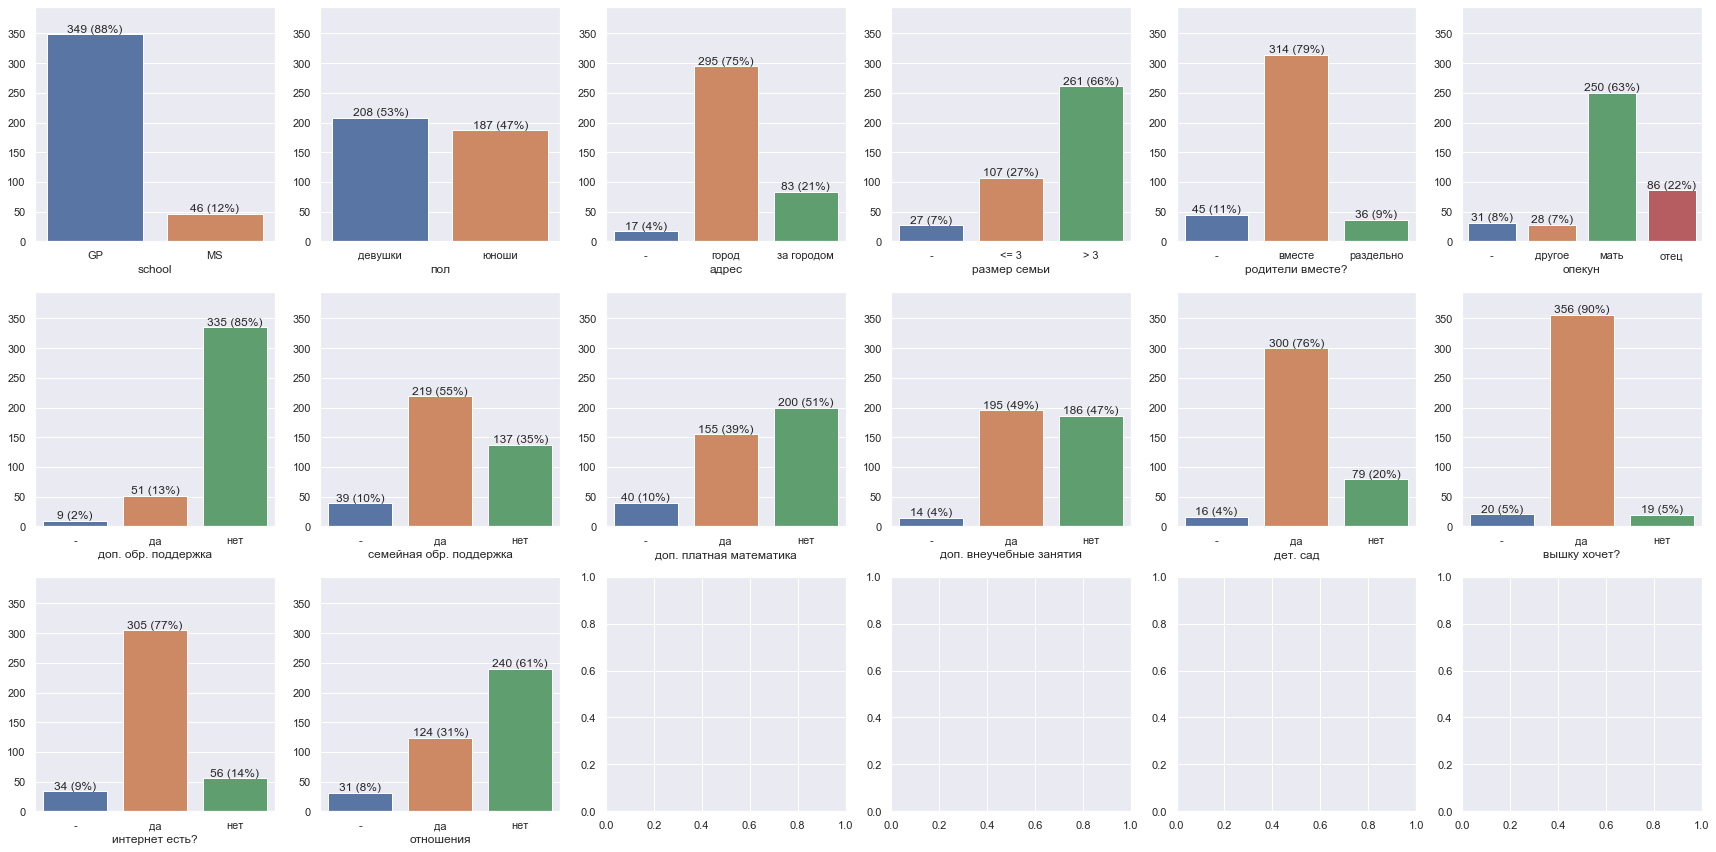

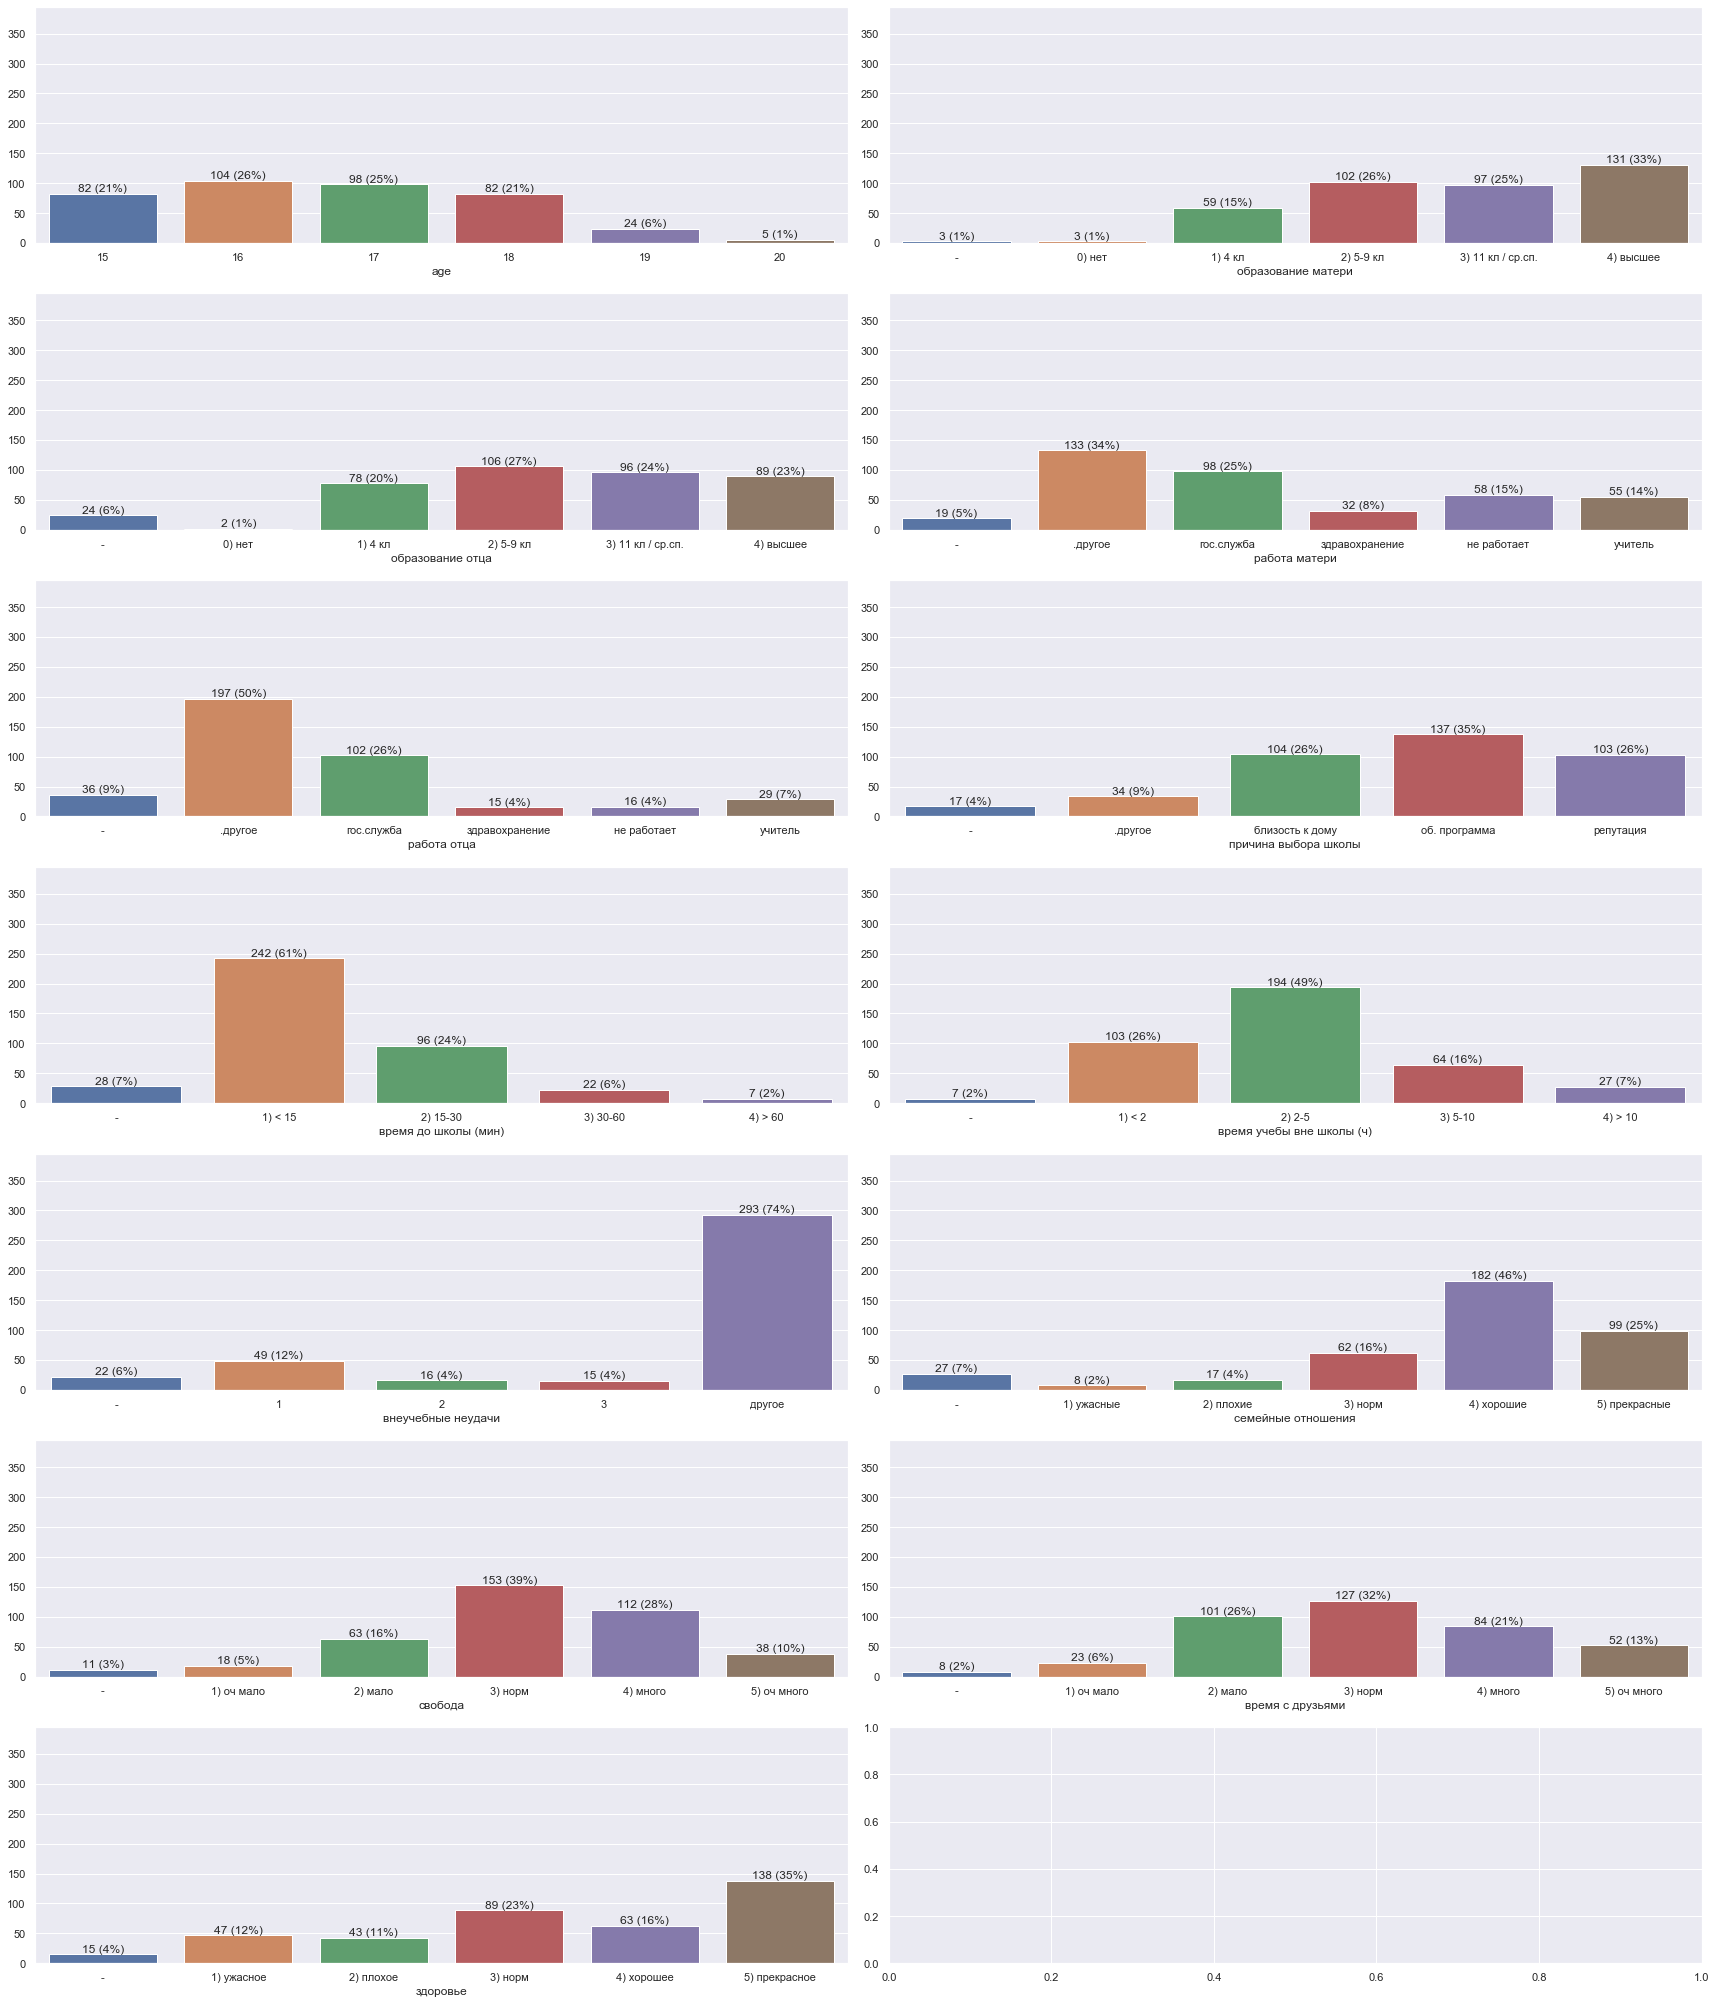

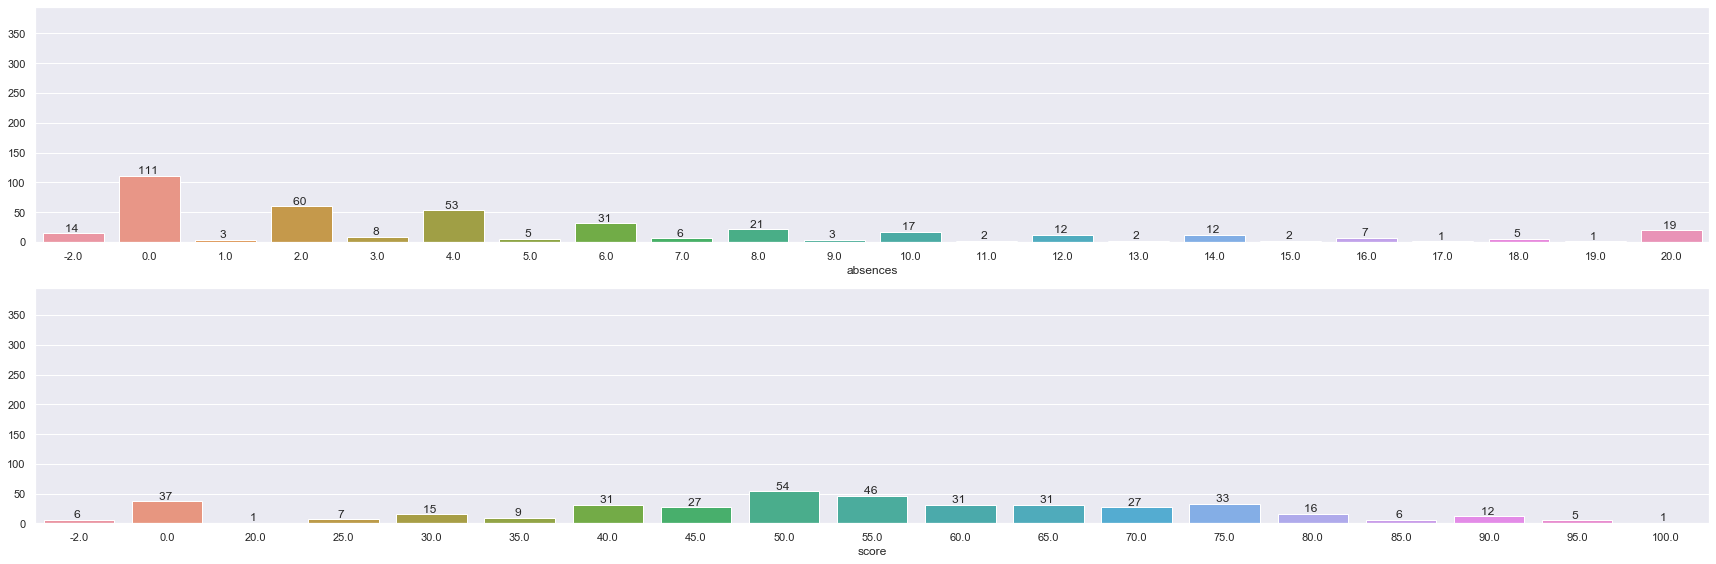

In [429]:
#Напишем функйию для вывод графиков # #Подготовим снначала место для вывода значений
def explore(stud, columns, inrow = 4, percent = True):
  fig, axes = plt.subplots(
    math.ceil(len(columns)/inrow), 
    inrow, 
    figsize=(24, math.ceil(len(columns)/inrow) * 4)
  )

  for column in columns:
    if len(columns) > len(columns) / inrow:
      ax = axes[
        int(math.floor(columns.index(column) + 1) / inrow - 0.00000001),
        int(columns.index(column) % inrow)
      ]
    else:
      ax = axes[int(math.floor(columns.index(column) + 1) / inrow - 0.00000001)]

    stud.sort_values(by = [column], inplace = True)
    countplot = sns.countplot(data = stud, x = column, ax = ax)
  
    countplot.set(
      ylim=(0, len(stud)),
      xlabel = rules[column]['title'] if column in list(rules.keys()) else column, 
      ylabel=''
    )
  
    for p in countplot.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        countplot.annotate(
            f'{int(y)} {f"({int(round(100*y/len(stud), 0))}%)" if percent else ""}', 
            (x.mean(), y), 
            ha ='center', 
            va='bottom'
        )
  
  fig.tight_layout() 
  fig.show()

explore(stud, ['school', 'sex', 'address', 'famsize', 'pstatus', 
  'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 
  'higher', 'internet', 'romantic'], 6)

explore(stud, ['age', 'medu', 'fedu', 'mjob', 'fjob', 'reason', 
  'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 
  'goout', 'health'], 2)

explore(stud, ['absences', 'score'], 1, percent = False)


Благодаря выбранному типу диаграмм мы видим особенности и отличия различных признаков друг от друга. Давайте рассмотрим какие признаки и какие колличественные показатели у нас преобладают в наших
таблицах сравнения:
 - Большенсство учаться в школе  Gp
 - Девушек больше чем парней с рассматриваемой выборке
 - Живут почте все городе
 - В семье больше 3х человек и при этом родители не в разводе
 - Дополнительное образование почти никто не использует, но основное образование спонсирует семья
 - Но большенство не занимаются дополнительно по математике, но занимаются другими занятиями вне учебное время
 - Почти все все были в детсаду и почти все устремлены поступить в высшее учебное заведение
 - У большенства есть интернет и нет отношений 
 - Основной возраст 16 лет
 - В большенстве рассмотренных семей у матерей есть высшее образование, но у отцов только 5-9 класс
 - Выбирают школу потому что нравиться образовательная программа и при этом идти до школы меньше 15 минут
 - Большенство занимаются учебой вне школы от 2-до 5 часов,
 - Почти у всех хорошие и даже прекрасные отношения дома и чувствую умеренное кол-во личной свободы, и имеют прекрасное здоровье
 
 
 Дополнительно по графикам можно увидеть предполагаемые выбросы в столбцах
 - семейные отношения
 - возраст
 - образование матери
 - образование отца 

Не понятные значения получили в стобцах 
- образование отца - правый выбро - надо будет проверить что это
- семеный отношения - значение - 1 - не понятно 
-



In [430]:
# Сделаем преобразования в столбце семейные отношения

stud['famrel'][stud['famrel'] == '-1.0'] = rules['famrel']['values']['1.0']



In [431]:
# Cделаем преобразования в столбце образование отца 

stud['fedu'][stud['fedu'] == '40.0'] = rules['fedu']['values']['4.0']


## Выбросы

In [432]:
#Будем искать выбросы в числовых столбцах. Берем интерквартильное расстояние и применяем формулу 


In [433]:
def show_outliners():
  for column_name in stud:
    column = stud[column_name]
    if column.dtype in ['int64', 'float64']:
      IQR = column.quantile(0.75) - column.quantile(0.25)
      outliners = {
        "left": column.quantile(0.25) - 1.5 * IQR, 
        "right": column.quantile(0.75) + 1.5 * IQR
      }
      print(column_name, outliners)

    
show_outliners()

age {'left': 13.0, 'right': 21.0}
absences {'left': -12.0, 'right': 20.0}
score {'left': -5.0, 'right': 115.0}


 Итого у нас выбросы в трех числовых столбцах, которые нам предлагает функция увидеть:
 
 - в возрасте это значение 21
 - в пропусках выбросы слева и справа 
 - и показывает выбросы в столбцах оценки

Рассмотрим эти столбцы дополнительно

In [434]:
stud.age.value_counts()

16    104
17     98
18     82
15     82
19     24
20      5
Name: age, dtype: int64

In [435]:
#будем считать что 20 21 и 22 это все очень маленькие значения относительноосновных
#проработаем эти данные и примем их все за значение 20
stud['age'][stud['age'] >= 20] = 20


In [436]:
stud.score.value_counts()
#выбросов нет

 50.0     54
 55.0     46
 0.0      37
 75.0     33
 65.0     31
 60.0     31
 40.0     31
 70.0     27
 45.0     27
 80.0     16
 30.0     15
 90.0     12
 35.0      9
 25.0      7
-2.0       6
 85.0      6
 95.0      5
 20.0      1
 100.0     1
Name: score, dtype: int64

In [438]:
print(stud.absences.value_counts())
#преобразуем наши выбромым 212 и 385. А все что выше 20 соединим в одно
stud["absences"][stud["absences"] > 200] = -2
stud["absences"][stud["absences"] > 20] = 20


 0.0     111
 2.0      60
 4.0      53
 6.0      31
 8.0      21
 20.0     19
 10.0     17
-2.0      14
 12.0     12
 14.0     12
 3.0       8
 16.0      7
 7.0       6
 18.0      5
 5.0       5
 9.0       3
 1.0       3
 11.0      2
 13.0      2
 15.0      2
 19.0      1
 17.0      1
Name: absences, dtype: int64


## Корреляция

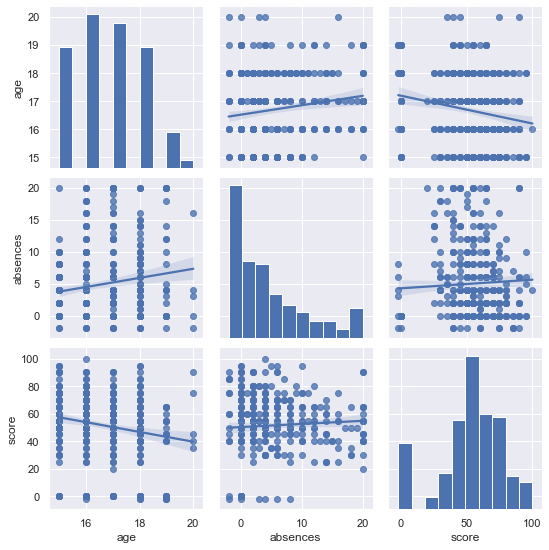

In [439]:
#Рассматриваем графики с числовыми значенияи
sns.pairplot(stud, kind = 'reg')


Сразу бросаются в глаза корреляция 
- по возрасту
- по пропускам

Подробнее получается вот что:
Чем старше человек тем больше пропукает и хуже сдает экзамен
Чем больше человек пропускает- тем лучше он сдает экзамен


Так же слева снизу на графике оценки есть показатели 0 - что можно смело удалять и не учитывать в нашей выборке

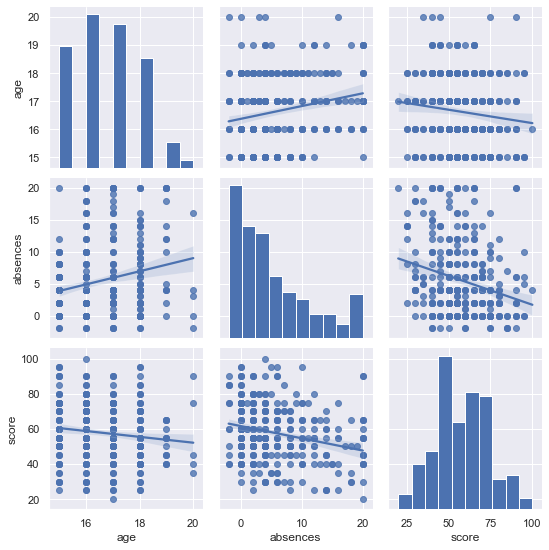

In [440]:
stud1 = stud[stud['score'] > 0]
sns.pairplot(stud1, kind = 'reg')


Теперь больше видна зависимоть возраста пропусков и итогой оценки

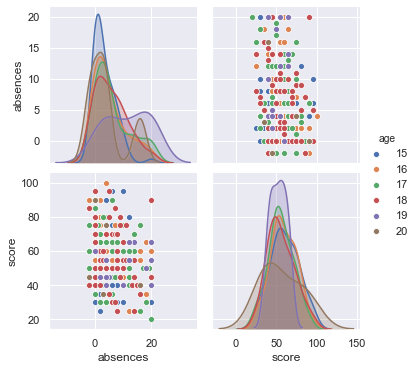

In [441]:
#Дополним нашу провероку метобом hue
sns.pairplot(stud1, hue = 'age')

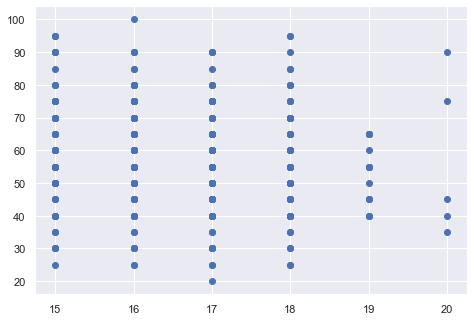

In [442]:
#Проверим наши гипотезы наглядно еще одним способом, однако дополнительно что-то мы не наблюдаем
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(x = stud1['age'], y = stud1['score'])

## Анализ номинативных переменных

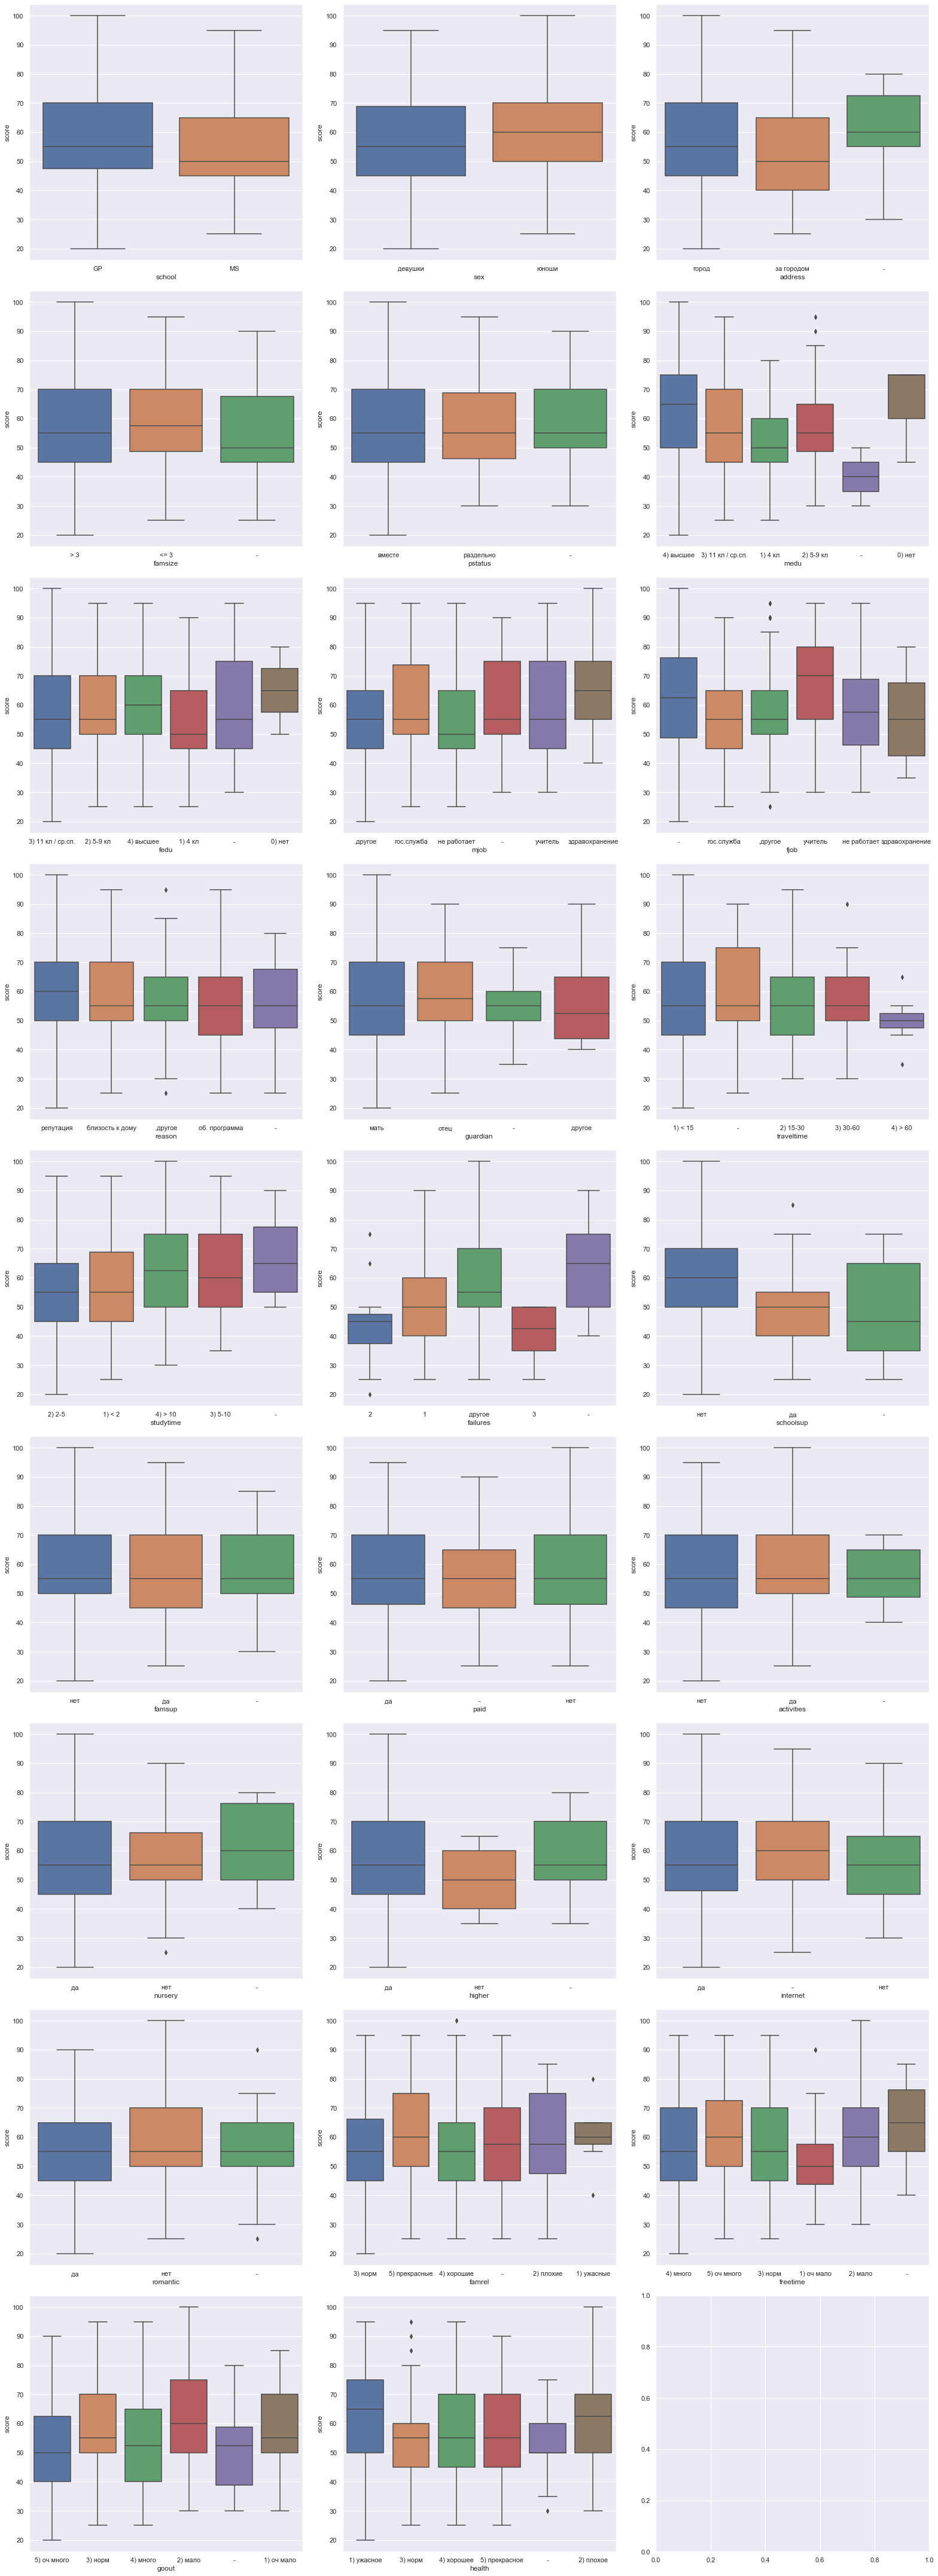

In [443]:
def countplots(stud1):
  fig, axes = plt.subplots(9, 3, figsize = (22, 60))

  count = 0

  for column_name in stud:
    if stud1[column_name].dtype == 'object':

      ax = axes[count // 3, count % 3]

      df = stud1.sort_values(by = [column_name])

      sns.boxplot(data = stud1, x = column_name, y = "score", ax = ax)

      count += 1

  fig.tight_layout() 
  fig.show()


countplots(stud1)

Итого:

Опишем признаки и значения тех, у кого лучшие результаты
- из школы GP
- Парни
- С образованием матерей гос служба 
- С образованием отцов учителя
- Выюирающие школу по репутации и близости к дому
- Много учатся
- Посещали детский сад
- Мало гуляют и без отношений
- С плохим здоровьем
- и д.р.


# Тест Стюдента

In [444]:
for col in stud1.columns:
    
    combs = list(combinations(stud1[col].unique(), 2))
    
    for a, b in combs:
        a_values = stud1.loc[stud[col] == a, 'score']
        b_values = stud1.loc[stud[col] == b, 'score']        
        pval = ttest_ind(a_values, b_values).pvalue
        if pval <= (0.05 / len(combs)):
            print(f"Найдены статистически значимые различия для колонки {col}")
            break

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки medu
Найдены статистически значимые различия для колонки fedu
Найдены статистически значимые различия для колонки mjob
Найдены статистически значимые различия для колонки fjob
Найдены статистически значимые различия для колонки studytime
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки schoolsup
Найдены статистически значимые различия для колонки goout
Найдены статистически значимые различия для колонки score


Давайте оставим тогда для нашей таблицы только значимые статистически данные 

In [445]:
finall_stud = stud1.loc[:, ['address', 'age', 'medu', 'fedu', 'mjob', 'fjob', 'studytime', 'failures', 'schoolsup', 'goout', 'absences', 'score']]
finall_stud

,address,age,medu,fedu,mjob,fjob,studytime,failures,schoolsup,goout,absences,score
216,город,17,4) высшее,3) 11 кл / ср.сп.,.другое,-,2) 2-5,2,нет,5) оч много,20.0,20.0
384,за городом,18,4) высшее,2) 5-9 кл,.другое,-,1) < 2,1,нет,3) норм,14.0,25.0
100,город,16,4) высшее,4) высшее,гос.служба,гос.служба,1) < 2,другое,да,5) оч много,14.0,25.0
248,за городом,18,3) 11 кл / ср.сп.,3) 11 кл / ср.сп.,.другое,гос.служба,2) 2-5,1,нет,3) норм,8.0,25.0
72,за городом,15,1) 4 кл,1) 4 кл,.другое,.другое,2) 2-5,2,да,4) много,2.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...
113,город,15,4) высшее,2) 5-9 кл,учитель,.другое,1) < 2,другое,нет,2) мало,10.0,95.0
374,за городом,18,4) высшее,-,.другое,-,3) 5-10,другое,нет,4) много,0.0,95.0
110,город,15,4) высшее,4) высшее,учитель,учитель,1) < 2,другое,нет,3) норм,6.0,95.0
286,город,18,2) 5-9 кл,-,не работает,не работает,3) 5-10,другое,нет,3) норм,5.0,95.0


В результате EDA анализа мы провели анализ данных и получили следующие выводы:
    
В данных достаточно мало уникальных значений по каждому столбцу поэтому анализировать зависимости получается с большей точностью

Выбросмы были найдены только в столбцах с 'age' и 'score', что позволяет сделать вывод, что данные достаточно чистые

Положительныя корреляция параметров 'age' 'score' и 'absences' может говорить о том, что с годами оценки ухудшаются как и с пропусками занятий. 

Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это 'address', 'age', 'medu', 'fedu', 'mjob', 'fjob', 'studytime', 'failures', 'schoolsup', 'goout', 'absences', 'score'